In [1]:
raw_data <- read.csv("datasets/PanTHERIA_1-0_WR05_Aug2008.txt", sep = "\t")

In [10]:
rownames(raw_data) <- raw_data$MSW05_Binomial
raw_data_vars <- raw_data[,c(7, 9, 16, 21, 22, 23)]
colnames(raw_data_vars) <- c("body_mass_g", "body_length_mm", "gestation_length_d",
"litter_size", "litters_per_year", "longevity_m")
which_na <- sapply(1:nrow(raw_data_vars), function(i) any(raw_data_vars[i,] == -999))
# Remove those rows from data
data <- raw_data_vars[!which_na,]

In [12]:
data

body_mass_g  body_length_mm gestation_length_d
Canis lupus                    31756.51  1055.00        63.50            
Bos frontalis                 800143.05  2700.00       273.75            
Bos javanicus                 635974.34  2075.00       296.78            
Caluromys philander              246.47   224.27        23.99            
Atelerix algirus                 903.98   214.76        39.25            
Callorhinus ursinus            55464.82  1734.82       358.49            
Atherurus africanus             2875.65   430.99       108.18            
Atilax paludinosus              3600.16   499.01        77.27            
Babyrousa babyrussa            92950.09   950.00       156.50            
Balaenoptera musculus      154321304.50 30480.00       326.97            
Balaenoptera physalus       47506008.23 20641.06       338.36            
Chaetodipus fallax                19.19    83.35        25.00            
Chaetodipus formosus              20.02   193.91        28.00            
Equus zebra                   282462.13  2350.00       363.49            
Erinaceus europaeus              777.95   237.17        36.98            
Eptesicus serotinus               23.09    67.99        65.44            
Equus grevyi                  408000.35  2700.00       406.00            
Delphinapterus leucas        1381640.73  4249.83       394.24            
Bison bison                   624577.07  2849.24       283.17            
Bison bonasus                 675876.70  2900.00       265.99            
Blarina brevicauda                18.56   120.82        20.58            
Baiomys taylori                    7.43    63.90        21.99            
Balaena mysticetus          79691178.99 12187.12       379.90            
Balaenoptera acutorostrata   5587093.59  5529.31       304.16            
Balaenoptera borealis       22106251.95 18382.16       334.58            
Desmodus rotundus                 33.16    78.00       209.35            
Didelphis albiventris           1030.47   360.69        12.00            
Didelphis marsupialis           1134.75   402.70        14.00            
Elephantulus myurus               59.51   128.25        50.66            
Eliomys quercinus                114.61   138.74        22.97            
⋮                          ⋮            ⋮              ⋮                 
Sylvilagus floridanus        1207.19     371.00         27.00            
Synaptomys cooperi             28.01     105.50         23.30            
Syncerus caffer            592665.98    2525.86        337.49            
Tadarida brasiliensis          12.61      41.49         89.99            
Talpa europaea                 87.53     129.99         30.41            
Tamandua tetradactyla        4800.00     559.33        160.00            
Tamias amoenus                 50.63     118.06         30.46            
Tamias minimus                 42.87     111.56         29.19            
Tamias townsendii              79.12     139.23         28.00            
Tamiasciurus hudsonicus       200.24     188.42         34.25            
Tapirus indicus            311209.19    2224.85        396.50            
Alces alces                461900.76    2930.47        235.00            
Ammospermophilus leucurus     103.92     151.14         29.38            
Ammospermophilus nelsoni      160.42     168.38         26.00            
Antechinus bellus              38.73     114.62         30.00            
Antilocapra americana       47450.01    1310.00        247.99            
Antilope cervicapra         36301.10    1250.00        166.59            
Aplodontia rufa               806.21     306.95         30.00            
Apodemus flavicollis           31.60     103.12         24.50            
Apodemus sylvaticus            21.90      87.51         23.68            
Artibeus jamaicensis           43.63      78.30        138.70            
Arvicola amphibius            120.00     193.57         21.24            
Tenrec ecaudatus              8

In [17]:
library(ggplot2)
library(tidyverse)

── Attaching packages ──────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

Warning message:
“package ‘tibble’ was built under R version 4.1.1”
Warning message:
“package ‘readr’ was built under R version 4.1.1”
Warning message:
“package ‘stringr’ was built under R version 4.1.1”
Warning message:
“package ‘forcats’ was built under R version 4.1.1”
── Conflicts ─────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [19]:
updated = data %>% filter(body_length_mm < 5000)

In [32]:
cor(data$body_mass_g, data$body_length_mm)

[1] 0.8526265

#### Relationship
- positive correlation
- as body mass increases body length increases

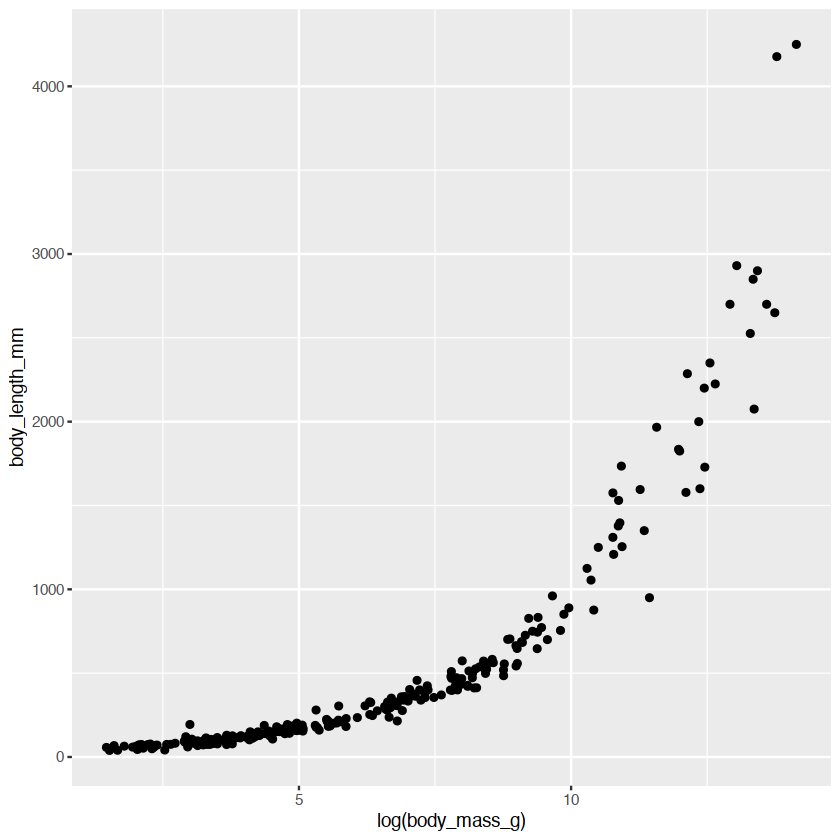

In [28]:
ggplot(aes(x=log(body_mass_g), y=body_length_mm), data=updated) + geom_point()

In [33]:
library(scatterplot3d)

In [57]:
d1

body_mass_g body_length_mm gestation_length_d
Canis lupus                31756.51   1055.00         63.50            
Bos frontalis             800143.05   2700.00        273.75            
Bos javanicus             635974.34   2075.00        296.78            
Caluromys philander          246.47    224.27         23.99            
Atelerix algirus             903.98    214.76         39.25            
Callorhinus ursinus        55464.82   1734.82        358.49            
Atherurus africanus         2875.65    430.99        108.18            
Atilax paludinosus          3600.16    499.01         77.27            
Babyrousa babyrussa        92950.09    950.00        156.50            
Chaetodipus fallax            19.19     83.35         25.00            
Chaetodipus formosus          20.02    193.91         28.00            
Equus zebra               282462.13   2350.00        363.49            
Erinaceus europaeus          777.95    237.17         36.98            
Eptesicus serotinus           23.09     67.99         65.44            
Equus grevyi              408000.35   2700.00        406.00            
Bison bison               624577.07   2849.24        283.17            
Bison bonasus             675876.70   2900.00        265.99            
Blarina brevicauda            18.56    120.82         20.58            
Baiomys taylori                7.43     63.90         21.99            
Desmodus rotundus             33.16     78.00        209.35            
Didelphis albiventris       1030.47    360.69         12.00            
Didelphis marsupialis       1134.75    402.70         14.00            
Elephantulus myurus           59.51    128.25         50.66            
Eliomys quercinus            114.61    138.74         22.97            
Heterocephalus glaber         39.36    129.61         70.49            
Heterohyrax brucei          2453.66    468.99        228.12            
Lagostomus maximus          4660.94    523.73        155.73            
Lama glama                 78322.67   1595.10        342.74            
Eulemur macaco              2470.43    397.11        127.49            
Eulemur mongoz              1771.13    354.85        129.00            
⋮                         ⋮           ⋮              ⋮                 
Sylvilagus floridanus       1207.19    371.00         27.00            
Synaptomys cooperi            28.01    105.50         23.30            
Syncerus caffer           592665.98   2525.86        337.49            
Tadarida brasiliensis         12.61     41.49         89.99            
Talpa europaea                87.53    129.99         30.41            
Tamandua tetradactyla       4800.00    559.33        160.00            
Tamias amoenus                50.63    118.06         30.46            
Tamias minimus                42.87    111.56         29.19            
Tamias townsendii             79.12    139.23         28.00            
Tamiasciurus hudsonicus      200.24    188.42         34.25            
Tapirus indicus           311209.19   2224.85        396.50            
Alces alces               461900.76   2930.47        235.00            
Ammospermophilus leucurus    103.92    151.14         29.38            
Ammospermophilus nelsoni     160.42    168.38         26.00            
Antechinus bellus             38.73    114.62         30.00            
Antilocapra americana      47450.01   1310.00        247.99            
Antilope cervicapra        36301.10   1250.00        166.59            
Aplodontia rufa              806.21    306.95         30.00            
Apodemus flavicollis          31.60    103.12         24.50            
Apodemus sylvaticus           21.90     87.51         23.68            
Artibeus jamaicensis          43.63     78.30        138.70            
Arvicola amphibius           120.00    193.57         21.24            
Tenrec ecaudatus             887.59    327.50         60.24            
Thomomys bottae              122.70    156.56         23.87       

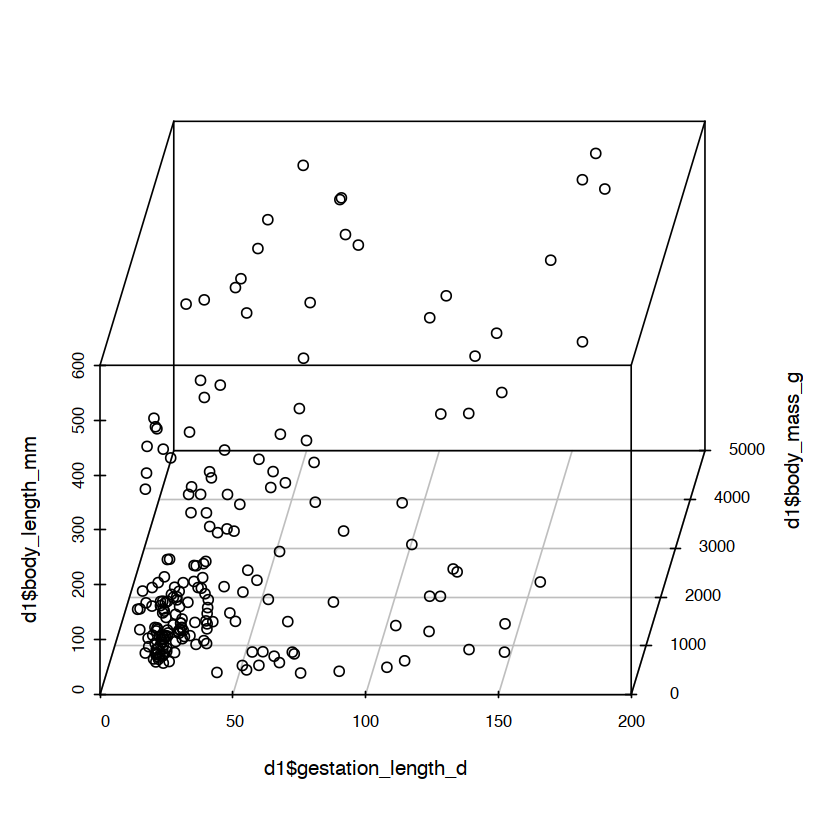

In [62]:
d1 = data %>% filter(body_length_mm <3000 & gestation_length_d < 200 & body_mass_g < 5000)
scatterplot3d(d1$gestation_length_d, y=d1$body_mass_g, z=d1$body_length_mm, angle=80)


In [63]:
require(plotly)

Loading required package: plotly

Warning message:
“package ‘plotly’ was built under R version 4.1.1”

Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




In [65]:
plot_ly(d1, x = ~gestation_length_d, y = ~body_mass_g, z = ~longevity_m, colors = c('#BF382A', '#0C4B8E'))

No trace type specified:
  Based on info supplied, a 'scatter3d' trace seems appropriate.
  Read more about this trace type -> https://plotly.com/r/reference/#scatter3d

No scatter3d mode specifed:
  Setting the mode to markers
  Read more about this attribute -> https://plotly.com/r/reference/#scatter-mode

No trace type specified:
  Based on info supplied, a 'scatter3d' trace seems appropriate.
  Read more about this trace type -> https://plotly.com/r/reference/#scatter3d

No scatter3d mode specifed:
  Setting the mode to markers
  Read more about this attribute -> https://plotly.com/r/reference/#scatter-mode



HTML widgets cannot be represented in plain text (need html)

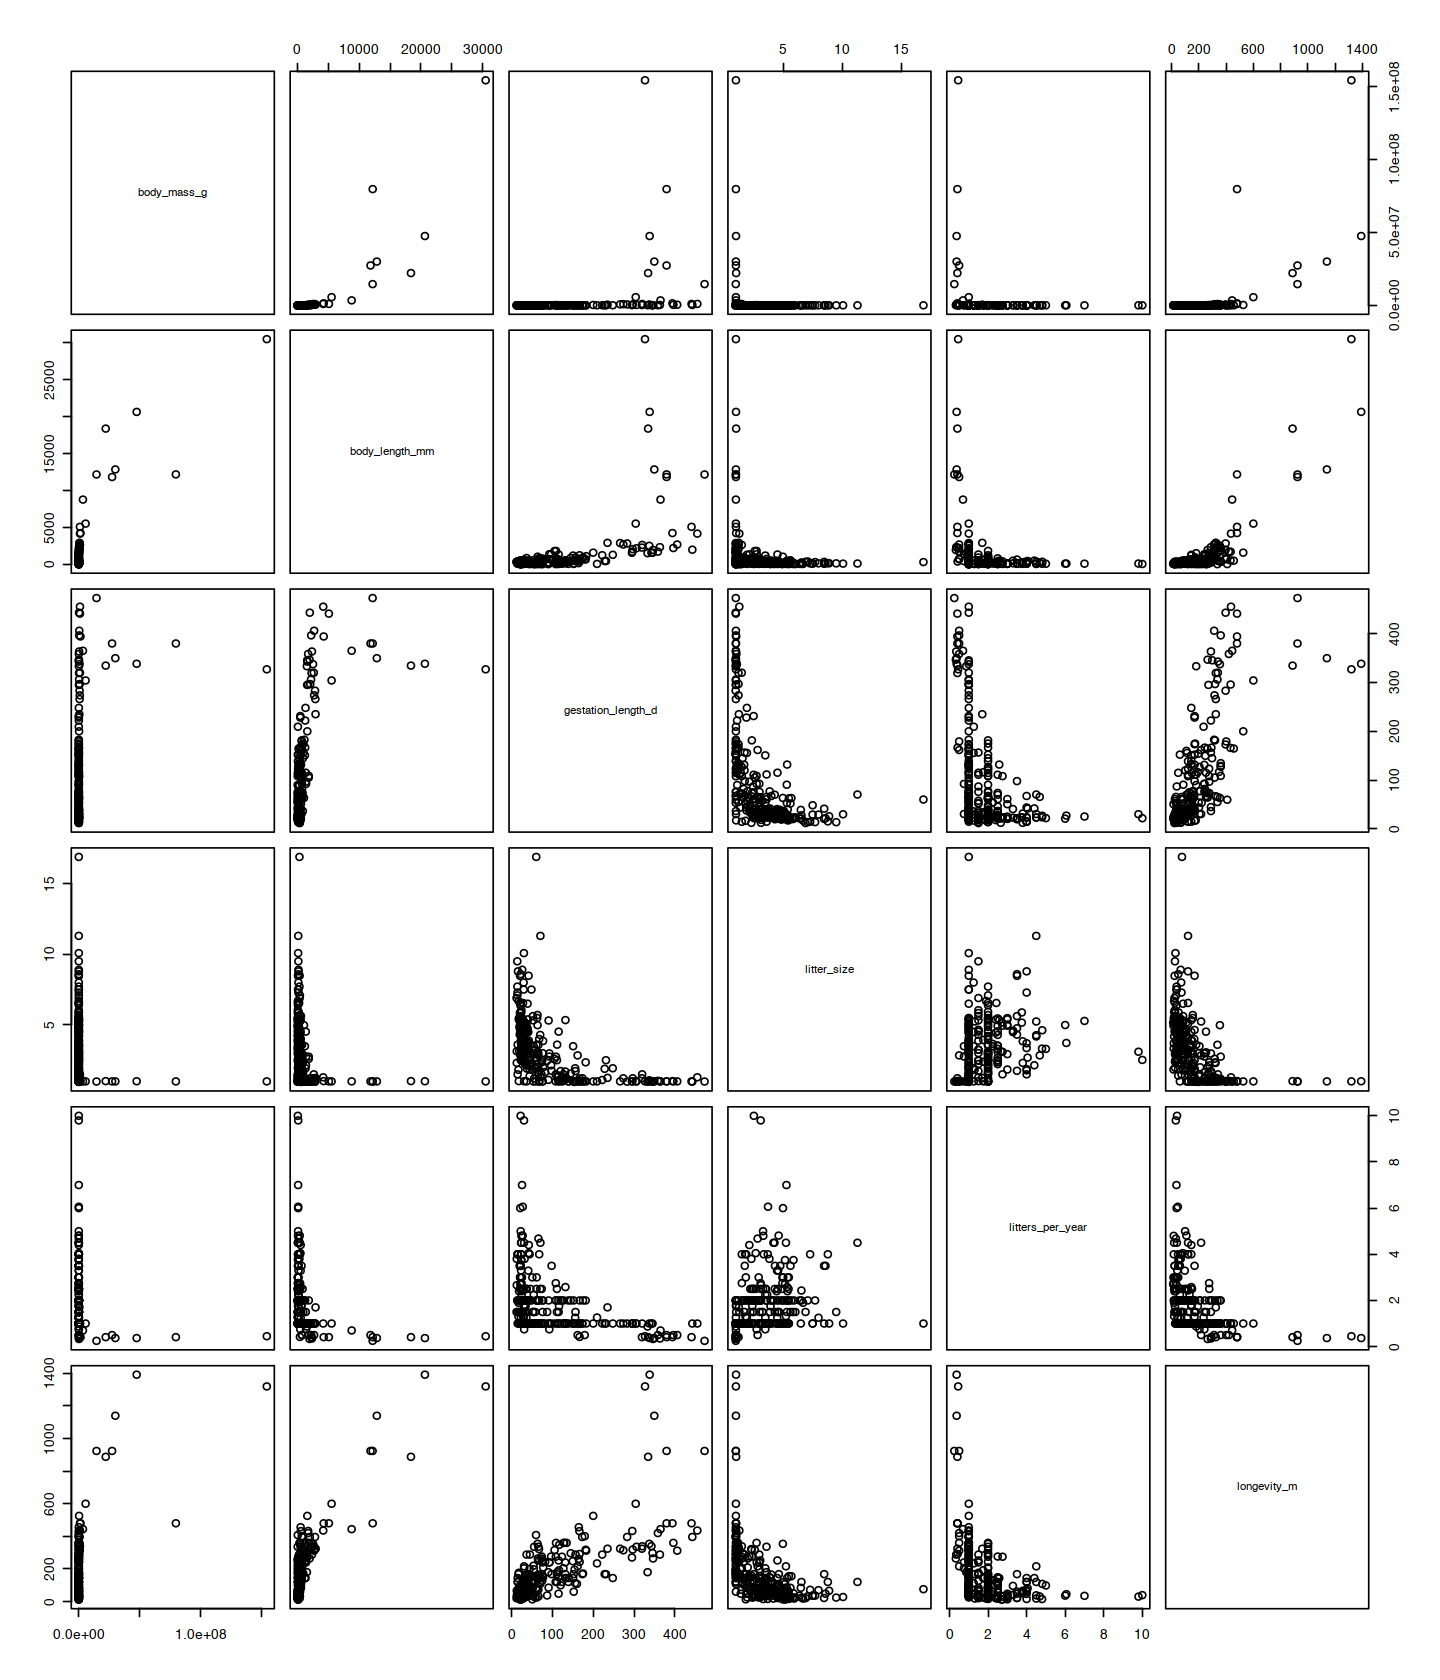

In [76]:
options(repr.plot.width=12, repr.plot.height=14)
pairs(data)

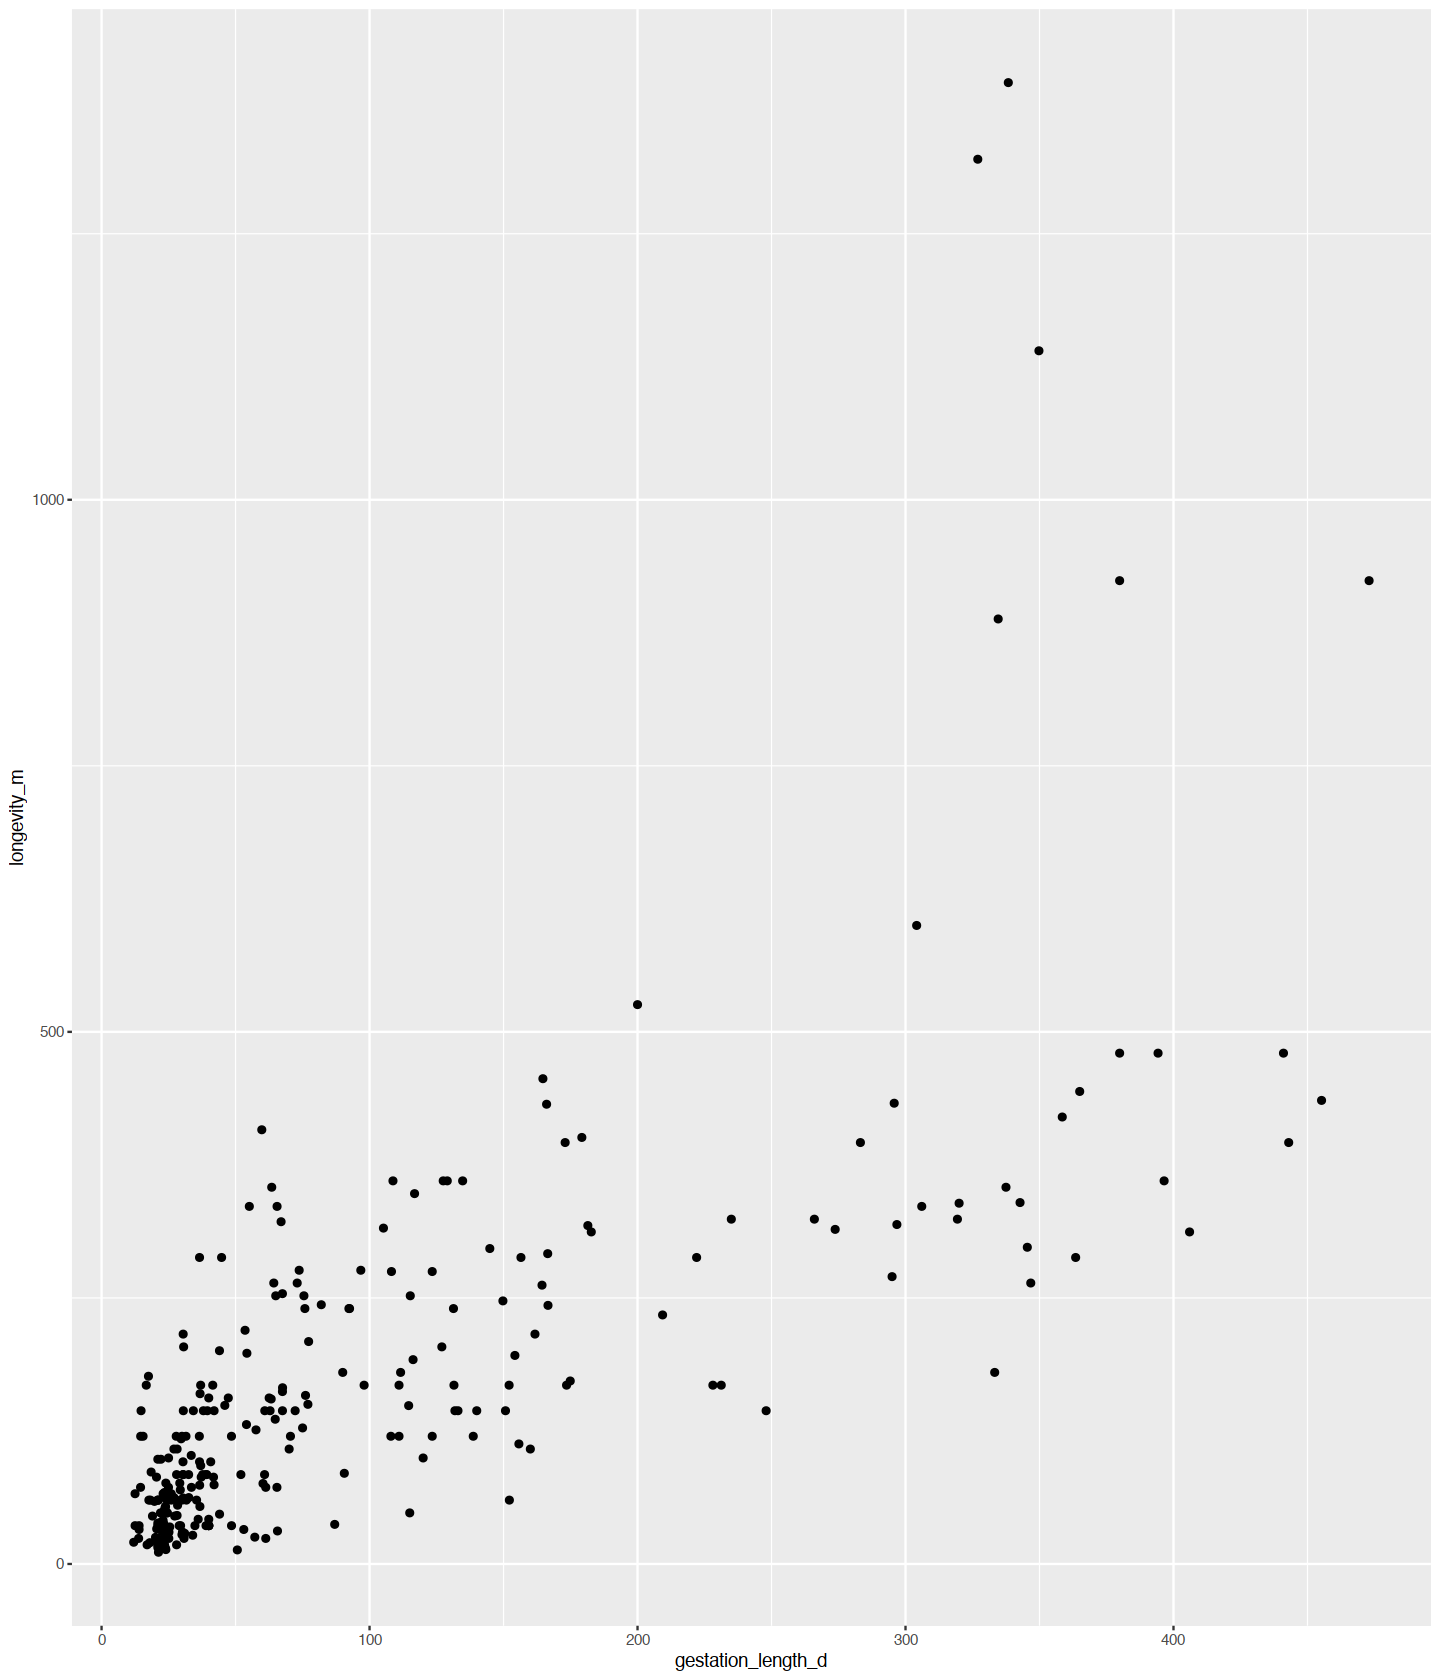

In [79]:
ggplot(aes(y=longevity_m, x=gestation_length_d), data=data) + geom_point()

In [96]:
m <- matrix(nrow=5,ncol=5,byrow=TRUE)
for(i in 2:ncol(data)) {       # for-loop over columns
  for (j in 2:ncol(data)) {
      c = cor(data[, i], data[, j])
      m[i - 1, j - 1] = c
      m[j - 1, i - 1] = c
  }
}
m

[,1]      
[1,]  1.0000000
[2,]  0.5792260
[3,] -0.2523107
[4,] -0.2353544
[5,]  0.8327524
     [,2]      
[1,]  0.5792260
[2,]  1.0000000
[3,] -0.5390654
[4,] -0.4020840
[5,]  0.7330304
     [,3]      
[1,] -0.2523107
[2,] -0.5390654
[3,]  1.0000000
[4,]  0.2444923
[5,] -0.4740162
     [,4]      
[1,] -0.2353544
[2,] -0.4020840
[3,]  0.2444923
[4,]  1.0000000
[5,] -0.3753546
     [,5]      
[1,]  0.8327524
[2,]  0.7330304
[3,] -0.4740162
[4,] -0.3753546
[5,]  1.0000000

In [98]:
require(corrplot)

Loading required package: corrplot

Warning message:
“package ‘corrplot’ was built under R version 4.1.1”
corrplot 0.92 loaded



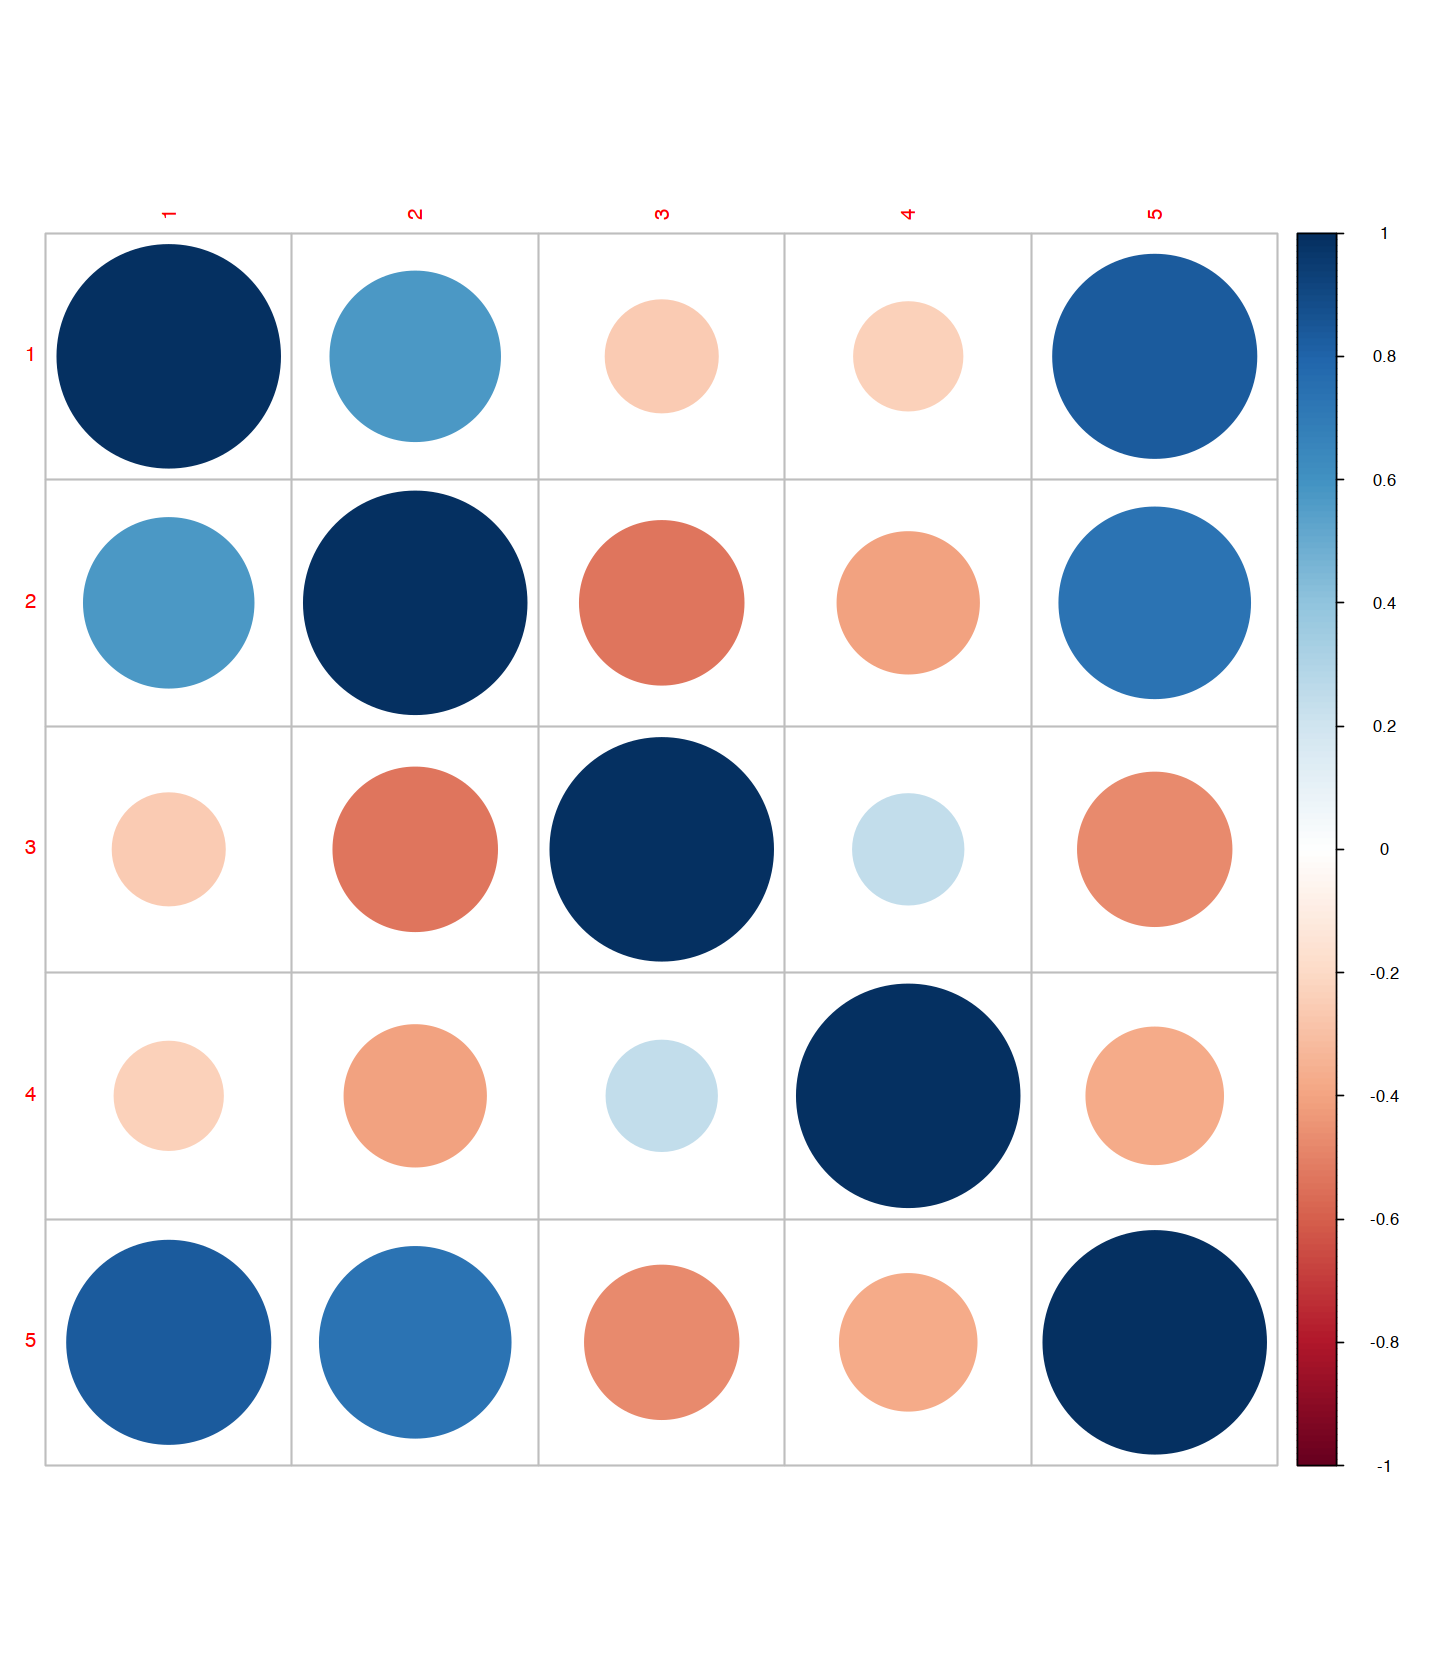

In [99]:
corrplot(m)

In [102]:
trimmed_data = data[1:20,]

In [103]:
require(MASS)

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:plotly’:

    select


The following object is masked from ‘package:dplyr’:

    select




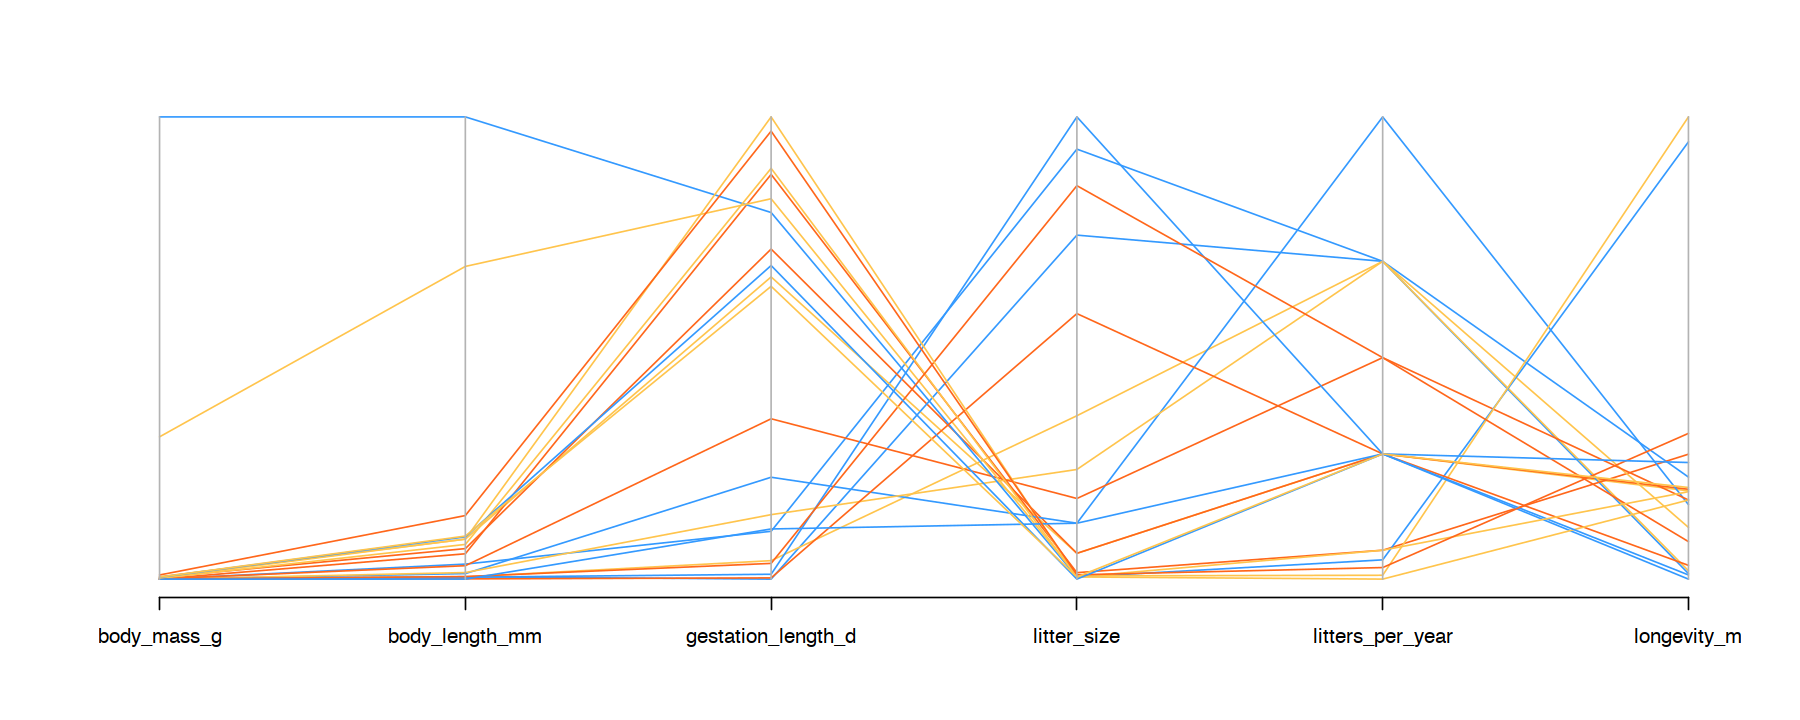

In [116]:
options(repr.plot.width=15, repr.plot.height=6)
cols <- c("#3399FF", "#FFC44C", "#FF661A")
parcoord(trimmed_data, col=cols)

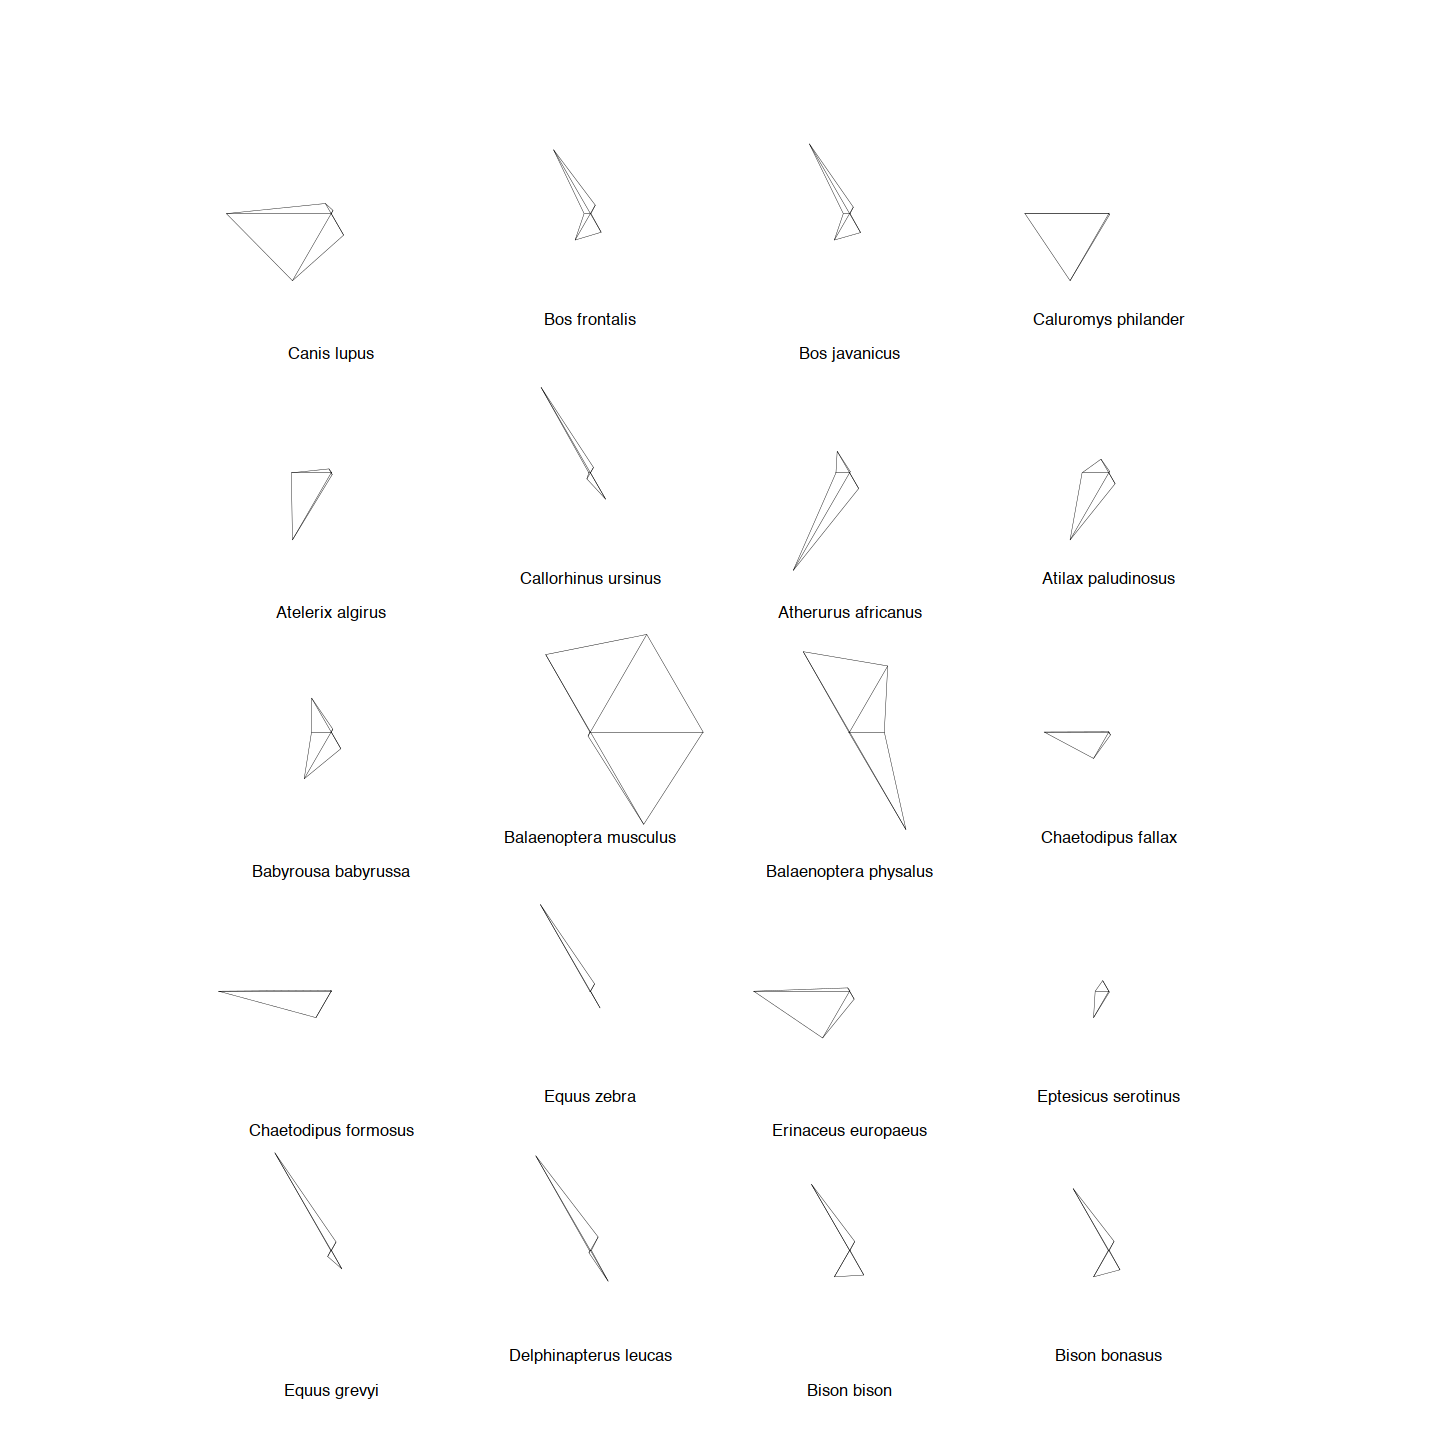

In [120]:
options(repr.plot.width=12, repr.plot.height=12)
stars(trimmed_data)